In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from IPython.display import display, HTML

In [2]:
df = pd.read_csv('train.csv')
df.corr()

""


In [3]:
#gatoperro.head()

In [4]:
#gatoperro.info()

In [5]:
def tcor(df):
    try:
        display(df.corr())
        fig, ax = plt.subplots(figsize=(6,5))
        v_cr = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
    except ValueError:
        print('ERROR: NO CORRELATION TABLE')
        pass
def thist(df):
    dat = df.select_dtypes(include=['float64','int64'])
    if len(dat.columns) > 0:
        display(dat.head())
        side = math.ceil(math.sqrt(dat.shape[1]))
        fig, frame = plt.subplots(side, side,figsize=(12,8))
        fig.tight_layout()
        x = 0
        y = 0
        for i, ax in enumerate(fig.axes):
            try:
                col = dat.columns[i]
                ax.set_xlabel(col)
                ax.hist(dat[col])
            except IndexError:
                pass
        plt.show()
        dat.iplot(kind='box')
    else:
        print("ERROR: NO NUMERIC FIELDS IN DATASET")
    
def load(namefile):
    return pd.read_csv(namefile, index_col=False)
def get_div(alist, values):
    init = """
       <body><style>.announce {color: #208ffb;font-weight: bold;}
       </style><div class="announce">NULLs in dataset:<br>---------------------<br>
       """
    inner = ""
    if type(alist)==list:
        for col, val in zip(alist, values):
            inner += col +": " + str(val) + "<br>"
    else:
        inner = alist
    closing = "</div></body>"
    html = init + inner + closing
    return html
def print_nulls(data):
    null_cols = data.isnull().sum()
    null_cols = null_cols[null_cols>0]
    drop_cols = list(null_cols[null_cols > 0].index)
    val_cols = [null_cols[col] for col in drop_cols]
    if len(drop_cols)==0:
        display(HTML(get_div('<br>This dataset has no nulls<br><br>','')))
    else:
        display(HTML(get_div(drop_cols,val_cols)))
def summary(csv):
    df = load(csv)
    display(df.head(2))
    display(df.tail(2))
    print_nulls(df)
    display(df.info())
    tcor(df)
    return df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


None

""


ERROR: NO CORRELATION TABLE


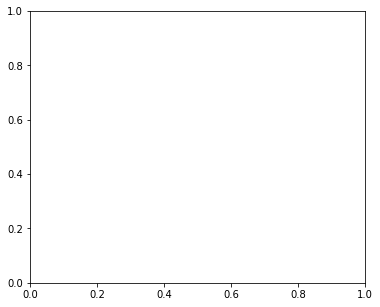

In [6]:
gatoperro = summary('train.csv')

In [15]:
gatoperro.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [8]:
thist(gatoperro)

ERROR: NO NUMERIC FIELDS IN DATASET


In [9]:
gatoperro.drop(['OutcomeSubtype'], axis=1,inplace=True)

In [13]:
from datetime import datetime as dt
def tod(ser):
    return dt.strptime(ser, '%Y-%m-%d %X').date()

gatoperro.DateTime = gatoperro.DateTime.apply(tod)

In [16]:
gatoperro.drop(['Name'], axis=1,inplace=True)
gatoperro.dropna(inplace=True)


In [22]:
gatoperro.isnull().sum()

AnimalID          0
DateTime          0
OutcomeType       0
AnimalType        0
SexuponOutcome    0
AgeuponOutcome    0
Breed             0
Color             0
dtype: int64

'def vc(col):\n    display(col.value_counts())\n    \nfor c in gatoperro.columns:\n    vc(gatoperro[c])\n    '

In [24]:
gatoperro.to_csv('gatoperro_prepro.csv')